# import

In [18]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings 
warnings.filterwarnings('ignore')
from scipy.stats import skew
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression,Ridge,Lasso, LogisticRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

## 전처리
    

In [19]:
test5 = pd.read_csv('2020_전처리_최종.csv')
test5.round(3)

,총생활인구수,기온,기압,풍속,운량,일강수량,최대순간풍속풍향,최대풍속풍향,평균풍속,최다풍향,일최심적설,일최심신적설,강수여부,일 미세먼지 농도(㎍/㎥),휴일여부,요일,계절,month,day,영등포구
0,423609.687,2.887,-1.002,-2.052,0.055,0.1,50,50,0.6,50,0.0,0.0,1.0,39.0,1,2,4,1,1,1113.0
1,487657.492,2.159,-0.893,-0.719,0.826,0.0,250,290,1.2,50,0.0,0.0,0.0,69.0,0,3,4,1,2,2441.0
2,491192.490,2.449,-1.014,-1.259,-0.759,0.0,270,270,1.7,290,0.0,0.0,0.0,78.0,0,4,4,1,3,2579.0
3,439758.830,2.279,-1.014,0.081,-0.784,0.0,340,320,1.9,50,0.0,0.0,0.0,63.0,0,5,4,1,4,1826.0
4,437808.924,2.322,-1.050,-2.000,-1.194,0.0,180,70,1.1,50,0.0,0.0,0.0,62.0,0,6,4,1,5,1647.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
361,401861.410,1.377,-0.712,-1.882,0.455,0.0,70,50,1.8,70,0.0,0.0,0.0,95.0,0,6,4,12,27,2736.0
362,455252.503,1.029,-0.579,-1.454,0.750,1.3,270,290,1.4,50,0.0,0.0,1.0,94.0,0,0,4,12,28,3888.0
363,456759.917,2.434,-0.857,1.469,0.477,0.2,290,320,2.9,270,0.0,0.0,1.0,96.0,0,1,4,12,29,2854.0
364,457026.584,4.324,-1.231,1.640,-0.184,0.0,290,270,4.1,270,0.0,0.0,0.0,47.0,0,2,4,12,30,1709.0


# LinearRegression, Ridge, Lasso

In [20]:
test5[[ '강수여부','휴일여부','요일', '계절', 'month','day',]]= test5[[ '강수여부','휴일여부','요일', '계절', 'month','day']].astype('str')

In [21]:
def get_rmse(model):
    import numpy as np
    from sklearn.metrics import mean_squared_error
    pred = model.predict(X_test)
    mse = mean_squared_error(y_test, pred)
    rmse = np.sqrt(mse)
    print(model.__class__.__name__, 'RMSE: ', np.round(rmse,3))
    return rmse
def get_rmses(models):
    rmses = []
    for model in models:
        rmse = get_rmse(model)
        rmses.append(rmse)
    return rmses

In [22]:
X = test5.drop(columns=['영등포구'])
y = test5['영등포구']
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=156)

In [23]:
lr_reg = LinearRegression() #선형회귀
lr_reg.fit(X_train, y_train)
pred = lr_reg.predict(X_test)
mse = mean_squared_error(y_test, pred)
rmse = np.sqrt(mse)
ridge_reg = Ridge()
ridge_reg.fit(X_train, y_train)
lasso_reg = Lasso()
lasso_reg.fit(X_train, y_train)
models = [lr_reg, ridge_reg, lasso_reg]
get_rmses(models) # R2 점수 추가함

LinearRegression RMSE:  1024.298
Ridge RMSE:  1022.051
Lasso RMSE:  1024.3


[1024.2978822456344, 1022.0513400135153, 1024.2996221885587]

In [24]:
# 왜곡도 확인
features_index = test5.dtypes[test5.dtypes != 'object'].index
skew_features= test5[features_index].apply(lambda x : skew(x))
skew_features_top = skew_features[skew_features>2]
skew_features_top.sort_values(ascending=False)

일최심신적설    10.747071
일최심적설      9.583432
일강수량       4.404383
dtype: float64

In [25]:
# 왜곡도 1 이상은 로그로 변환
test5[skew_features_top.index]= np.log1p(test5[skew_features_top.index])

<AxesSubplot:xlabel='영등포구', ylabel='Count'>

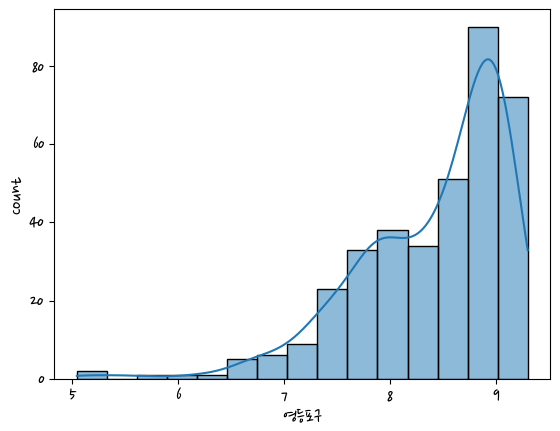

In [26]:
# y값 정규분포로 변환
log_test = np.log1p(test5['영등포구'])
sns.histplot(log_test, kde=True)

In [27]:
# 문자열 치환 원앤핫인코딩
test5 = pd.get_dummies(test5)
X = test5.drop(columns=['영등포구'])
y = log_test
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=156)

In [28]:
# 모델 확인
lr_reg = LinearRegression()
lr_reg.fit(X_train, y_train)
pred = lr_reg.predict(X_test)
mse = mean_squared_error(y_test, pred)
rmse = np.sqrt(mse)
print(f'MSE: {mse}, RMSE: {rmse}, R2: {r2_score(y_test, pred)}')
ridge_reg = Ridge()
ridge_reg.fit(X_train, y_train)
lasso_reg = Lasso()
lasso_reg.fit(X_train, y_train)
models = [lr_reg, ridge_reg, lasso_reg]
get_rmses(models)

MSE: 0.10958104108458565, RMSE: 0.33103027215737485, R2: 0.7566123792655945
LinearRegression RMSE:  0.331
Ridge RMSE:  0.324
Lasso RMSE:  0.673


[0.33103027215737485, 0.3238538888846048, 0.6728332422441412]

In [29]:
# 루트치환값 다시 원래대로 돌려서 비교
y_t= np.expm1(y_test)
p_t = np.expm1(pred)
for solve, predd in zip(y_t, p_t):
    print(f'{solve}, {predd}') 

6298.999999999996, 4661.561468470016
7628.9999999999945, 8181.875469923967
1113.0000000000005, 1227.4038089471658
8602.999999999995, 7911.500933988629
2404.0, 2400.725750726732
3026.9999999999995, 2248.507575933374
2370.000000000001, 2208.056772225623
6069.000000000002, 2520.209142015416
9589.000000000005, 9527.081771909947
7672.999999999998, 10099.746875912273
7283.000000000005, 6360.533628749365
7084.000000000003, 8223.977700721072
8450.000000000005, 6566.402865468421
2484.000000000001, 2790.0546057943893
2833.999999999999, 3730.15950067207
844.0000000000001, 2099.777773819377
2790.0000000000005, 1647.043403792839
9038.999999999998, 6267.445532537854
7971.999999999999, 7185.0623909981905
8221.000000000004, 9265.895795978513
7079.999999999999, 8357.619015795615
8224.999999999995, 7590.03734914299
7695.999999999995, 8848.614428272525
8729.0, 10104.710377835909
5994.999999999995, 5351.909884619027
9210.999999999995, 7171.473107312204
6744.999999999999, 6052.514516238236
2621.99999999999

## cross_val_score

In [30]:
from sklearn.linear_model import Ridge
from sklearn.model_selection import cross_val_score

In [31]:
X_data = test5.drop(columns=['영등포구'])
y_target = test5['영등포구']


ridge = Ridge(alpha=5)
neg_mse_scores = cross_val_score(ridge, X_data, y_target, scoring="neg_mean_squared_error",cv=5)
rmse_scores = np.sqrt(-1*neg_mse_scores)
avg_rmse = np.mean(rmse_scores)

In [32]:
def get_avg_rmse_cv(models):
    for model in models:
        rmse_list = np.sqrt(-cross_val_score(model,X,y,scoring='neg_mean_squared_error',cv=5)) #rmse = 5개가 나올 것
        rmse_avg = np.mean(rmse_list)
        print(f'{model.__class__.__name__} cv rmse 값 리스트 : {np.round(rmse_list,3)}')
        print(f'{model.__class__.__name__} cv 평균 rmse 값 : {np.round(rmse_avg,3)}')

get_avg_rmse_cv(models)

LinearRegression cv rmse 값 리스트 : [0.611 0.411 0.393 0.403 0.351]
LinearRegression cv 평균 rmse 값 : 0.434
Ridge cv rmse 값 리스트 : [0.615 0.409 0.388 0.402 0.335]
Ridge cv 평균 rmse 값 : 0.43
Lasso cv rmse 값 리스트 : [1.147 0.59  0.762 0.795 0.58 ]
Lasso cv 평균 rmse 값 : 0.775


## GridSearchCV

In [33]:
from sklearn.model_selection import GridSearchCV

In [34]:
def print_best_params(model,params):
    grid_model = GridSearchCV(model,params,scoring='neg_mean_squared_error', cv=10) #GridSearchCV라서 scoring='neg' #scoring='neg_mean_squared_error' 예측값과 차이의 제곱?
    grid_model.fit(X,y)
    rmse = np.sqrt(-1*grid_model.best_score_)
    print(f'{model.__class__.__name__} 5 cv시 최적 평균 rmse 값:{np.round(rmse, 4)}, 최적 alpha값:{grid_model.best_params_}')

In [35]:
ridge_param = {
    'alpha':[0.0001,0.01,0.05, 0.1, 1, 5, 8, 10, 12, 15, 20, 30, 40, 50, 100]
} #ridge더 크게 rasso 더 작게
print_best_params(ridge_reg, ridge_param)

Ridge 5 cv시 최적 평균 rmse 값:0.3824, 최적 alpha값:{'alpha': 8}


In [36]:
lasso_param = {'alpha':[0.0001,0.001, 0.005, 0.008, 0.05, 0.05, 0.1, 0.5, 1, 5, 10, 15, 30]} 
print_best_params(lasso_reg, lasso_param)

Lasso 5 cv시 최적 평균 rmse 값:0.4096, 최적 alpha값:{'alpha': 0.005}


In [37]:
lr_reg = LinearRegression()
lr_reg.fit(X_train,y_train)

ridge_reg = Ridge(alpha=5)
ridge_reg.fit(X_train,y_train)

lasso_reg = Lasso(alpha=0.005)
lasso_reg.fit(X_train,y_train)

models=[lr_reg, ridge_reg,lasso_reg] 
get_rmses(models)

#visualize_coefficient(models)

lr_reg = LinearRegression()
lr_reg.fit(X_train, y_train)

pred = lr_reg.predict(X_test)
mse = mean_squared_error(y_test, pred)
rmse = np.sqrt(mse)
print(f'MSE: {mse}, RMSE: {rmse}, R2: {r2_score(y_test, pred)}')


LinearRegression RMSE:  0.331
Ridge RMSE:  0.31
Lasso RMSE:  0.3
MSE: 0.10958104108458565, RMSE: 0.33103027215737485, R2: 0.7566123792655945


In [38]:
lr_reg = LinearRegression()
lr_reg.fit(X_train, y_train)

pred = lr_reg.predict(X_test)
mse = mean_squared_error(y_test, pred)
rmse = np.sqrt(mse)
print(f'MSE: {mse}, RMSE: {rmse}, R2: {r2_score(y_test, pred)}')




ridge_reg = Ridge()
ridge_reg.fit(X_train, y_train)
lasso_reg = Lasso()
lasso_reg.fit(X_train, y_train)
models = [lr_reg, ridge_reg, lasso_reg]

for model in models:
    get_rmse(model)

MSE: 0.10958104108458565, RMSE: 0.33103027215737485, R2: 0.7566123792655945
LinearRegression RMSE:  0.331
Ridge RMSE:  0.324
Lasso RMSE:  0.673


# RandomForestRegressor

In [39]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import accuracy_score
import pandas as pd
import warnings
warnings.filterwarnings('ignore')

In [40]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=32)

In [41]:
rf_clf = RandomForestRegressor(random_state=156, max_depth=8)
rf_clf.fit(X_train,y_train)

pred = rf_clf.predict(X_test)
mse = mean_squared_error(y_test, pred)
rmse = np.sqrt(mse)

print(f'MSE: {mse}, RMSE: {rmse}, R2: {r2_score(y_test, pred)}')


MSE: 0.07704886391995851, RMSE: 0.2775767712182677, R2: 0.8035890616156485


In [42]:
log_test = np.log1p(test5['영등포구'])
test5 = pd.get_dummies(test5)
X = test5.drop(columns=['영등포구'])
y = log_test
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=32)

In [43]:
rf_clf = RandomForestRegressor(random_state=32, max_depth=8)
rf_clf.fit(X_train,y_train)

pred = rf_clf.predict(X_test)
mse = mean_squared_error(y_test, pred)
rmse = np.sqrt(mse)

print(f'MSE: {mse}, RMSE: {rmse}, R2: {r2_score(y_test, pred)}')

MSE: 0.08253360682354907, RMSE: 0.28728662834101604, R2: 0.7896074991929989


## GridSearchCV 
RandomForestRegressor - 하이퍼 파라미터 수정

In [44]:
from sklearn.model_selection import GridSearchCV

In [45]:
params = {
    'max_depth': [6, 12, 18, 26, 30],
    'min_samples_leaf': [1, 6, 12, 18, 24],
    'min_samples_split':[2, 6, 12, 18, 24]
}

In [46]:
rf_clf = RandomForestRegressor(n_estimators=100, random_state=32, n_jobs=-1)
grid_cv = GridSearchCV(rf_clf, param_grid=params, cv=2, n_jobs=-1)
grid_cv.fit(X_train, y_train)

print('최적 하이퍼 파라미너:\n', grid_cv.best_params_)

최적 하이퍼 파라미너:
 {'max_depth': 12, 'min_samples_leaf': 1, 'min_samples_split': 2}


In [47]:
rf_clf1    = RandomForestRegressor(n_estimators=100, max_depth=12, min_samples_leaf=1, min_samples_split=6, random_state=32)
rf_clf1.fit(X_train,y_train)

pred = rf_clf1.predict(X_test)
mse = mean_squared_error(y_test, pred)
rmse = np.sqrt(mse)

print(f'MSE: {mse}, RMSE: {rmse}, R2: {r2_score(y_test, pred)}')


MSE: 0.08167208119509022, RMSE: 0.2857832766189971, R2: 0.791803677676611


# XGBoost 

In [48]:
import xgboost as xgb
from xgboost import XGBRegressor

In [49]:
import xgboost

print(xgboost.__version__)

1.5.0


In [50]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings('ignore')

In [51]:
#학습용(80%), 데이터용(20%)
log_test = np.log1p(test5['영등포구'])
#test = test5['영등포구']
test5 = pd.get_dummies(test5)
X = test5.drop(columns=['영등포구'])
y = log_test
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=32)

In [52]:
#최종 학습용(90%), 검즘용(10%)
X_tr, X_val, y_tr, y_val = train_test_split(X_train,y_train,test_size=0.1,random_state=32)

In [53]:
#학습, 검증, 테스트용 DMatrix 생성
dtr = xgb.DMatrix(data=X_tr, label=y_tr)
dval = xgb.DMatrix(data=X_val, label=y_val)
dtest = xgb.DMatrix(data=X_test, label=y_test)

In [54]:
params = {
    'max_depth':3,
    'eta':0.05,
    #'objective':'binary:logistic',
    # 'eval_metric':'logloss'
}
num_rounds = 400

In [55]:
eval_list = [(dtr,'train'),(dval,'eval')]
xgb_model = xgb.train(params = params, dtrain=dtr, num_boost_round=num_rounds,
                      early_stopping_rounds=500, evals=eval_list)

# pred = xgb_model.predict(dtest)
# print(pred)

pred = xgb_model.predict(dtest)
mse = mean_squared_error(y_test, pred)
rmse = np.sqrt(mse)

print(f'MSE: {mse}, RMSE: {rmse}, R2: {r2_score(y_test, pred)}')


[0]	train-rmse:7.55829	eval-rmse:7.47783
[1]	train-rmse:7.18537	eval-rmse:7.10419
[2]	train-rmse:6.83103	eval-rmse:6.75714
[3]	train-rmse:6.49426	eval-rmse:6.42520
[4]	train-rmse:6.17431	eval-rmse:6.11179
[5]	train-rmse:5.87023	eval-rmse:5.80855
[6]	train-rmse:5.58120	eval-rmse:5.52461
[7]	train-rmse:5.30653	eval-rmse:5.25073
[8]	train-rmse:5.04542	eval-rmse:4.99593
[9]	train-rmse:4.79715	eval-rmse:4.74826
[10]	train-rmse:4.56136	eval-rmse:4.51313
[11]	train-rmse:4.33730	eval-rmse:4.28934
[12]	train-rmse:4.12437	eval-rmse:4.08153
[13]	train-rmse:3.92184	eval-rmse:3.87961
[14]	train-rmse:3.72957	eval-rmse:3.69149
[15]	train-rmse:3.54667	eval-rmse:3.50919
[16]	train-rmse:3.37299	eval-rmse:3.33614
[17]	train-rmse:3.20803	eval-rmse:3.17250
[18]	train-rmse:3.05124	eval-rmse:3.01636
[19]	train-rmse:2.90224	eval-rmse:2.87048
[20]	train-rmse:2.76043	eval-rmse:2.72828
[21]	train-rmse:2.62590	eval-rmse:2.59688
[22]	train-rmse:2.49806	eval-rmse:2.46985
[23]	train-rmse:2.37640	eval-rmse:2.34799
[2

In [56]:
y_t= np.expm1(y_test)
p_t = pd.Series(np.expm1(pred))
for solve, predd in zip(y_t, p_t):
    print(f'{solve}, {predd}') 

# mse = mean_squared_error(dtest, pred)
# rmse = np.sqrt(mse)

# print(f'MSE: {mse}, RMSE: {rmse}, R2: {r2_score(y_test, pred)}')

8055.0000000000055, 8758.2333984375
7133.999999999995, 6633.9541015625
2441.0, 1821.0457763671875
2963.9999999999986, 2695.44677734375
7919.000000000003, 7287.955078125
8169.999999999995, 7857.14599609375
2032.0000000000007, 1211.35888671875
7971.999999999999, 7501.6083984375
5590.0, 4896.19091796875
1524.0000000000005, 1523.681396484375
6744.999999999999, 5408.2734375
2404.0, 2155.748046875
7079.999999999999, 8041.6708984375
9120.000000000002, 8514.6318359375
6644.000000000003, 6392.4365234375
2370.000000000001, 3204.42626953125
3036.9999999999986, 3354.665283203125
9042.999999999995, 9281.978515625
9297.0, 9002.0791015625
5095.999999999999, 4520.845703125
6905.000000000004, 6966.271484375
5983.999999999999, 7219.60546875
4055.999999999997, 2718.00537109375
3193.0000000000005, 3247.70849609375
4011.9999999999995, 3853.656494140625
4101.999999999998, 2844.201416015625
3521.999999999999, 5236.68505859375
2043.0000000000002, 1894.6490478515625
5317.999999999995, 2722.51708984375
9699.000

# GBM

In [57]:
from sklearn.ensemble import GradientBoostingRegressor
import time

In [58]:
gb_ref = GradientBoostingRegressor(random_state=156)
gb_ref.fit(X_train, y_train)
gb_pred = gb_ref.predict(X_test)

mse = mean_squared_error(y_test, pred)
rmse = np.sqrt(mse)
print('RMSE: ', np.round(rmse,3))
print(f'R2: {r2_score(y_test, pred)}')

RMSE:  0.287
R2: 0.7893888580949526


In [60]:
gb_ref = GradientBoostingRegressor(n_estimators=200, max_depth=16, min_samples_leaf=6, min_samples_split=2, random_state=156)
gb_ref.fit(X_train, y_train)
gb_pred = gb_ref.predict(X_test)

mse = mean_squared_error(y_test, pred)
rmse = np.sqrt(mse)
print('RMSE: ', np.round(rmse,3))
print(f'R2: {r2_score(y_test, pred)}')

RMSE:  0.287
R2: 0.7893888580949526


# LightGBM

In [61]:
from lightgbm import LGBMRegressor

In [62]:
X_tr, X_val, y_tr, y_val = train_test_split(X_train, y_train, test_size=0.1, random_state=156)
lgbm = LGBMRegressor(n_estimators=100, learning_rate=0.05)

evals = [(X_tr, y_tr), (X_val, y_val)]
lgbm.fit(X_tr, y_tr, early_stopping_rounds=100, eval_metric='logloss', eval_set=evals, verbose=True)
preds = lgbm.predict(X_test)

mse = mean_squared_error(y_test, preds)
rmse = np.sqrt(mse)
print('RMSE: ', np.round(rmse,3))
print(f'R2: {r2_score(y_test, preds)}')

[1]	training's l2: 0.50423	valid_1's l2: 0.307888
Training until validation scores don't improve for 100 rounds
[2]	training's l2: 0.471565	valid_1's l2: 0.282155
[3]	training's l2: 0.442096	valid_1's l2: 0.258815
[4]	training's l2: 0.415439	valid_1's l2: 0.237275
[5]	training's l2: 0.390983	valid_1's l2: 0.217869
[6]	training's l2: 0.369128	valid_1's l2: 0.200191
[7]	training's l2: 0.348976	valid_1's l2: 0.184306
[8]	training's l2: 0.3292	valid_1's l2: 0.173529
[9]	training's l2: 0.312635	valid_1's l2: 0.159959
[10]	training's l2: 0.296232	valid_1's l2: 0.151366
[11]	training's l2: 0.281421	valid_1's l2: 0.14386
[12]	training's l2: 0.268058	valid_1's l2: 0.137111
[13]	training's l2: 0.25567	valid_1's l2: 0.130017
[14]	training's l2: 0.244437	valid_1's l2: 0.122664
[15]	training's l2: 0.234239	valid_1's l2: 0.114655
[16]	training's l2: 0.224721	valid_1's l2: 0.109652
[17]	training's l2: 0.216172	valid_1's l2: 0.105665
[18]	training's l2: 0.208319	valid_1's l2: 0.101007
[19]	training's 

In [63]:
from lightgbm import plot_importance

<AxesSubplot:title={'center':'Feature importance'}, xlabel='Feature importance', ylabel='Features'>

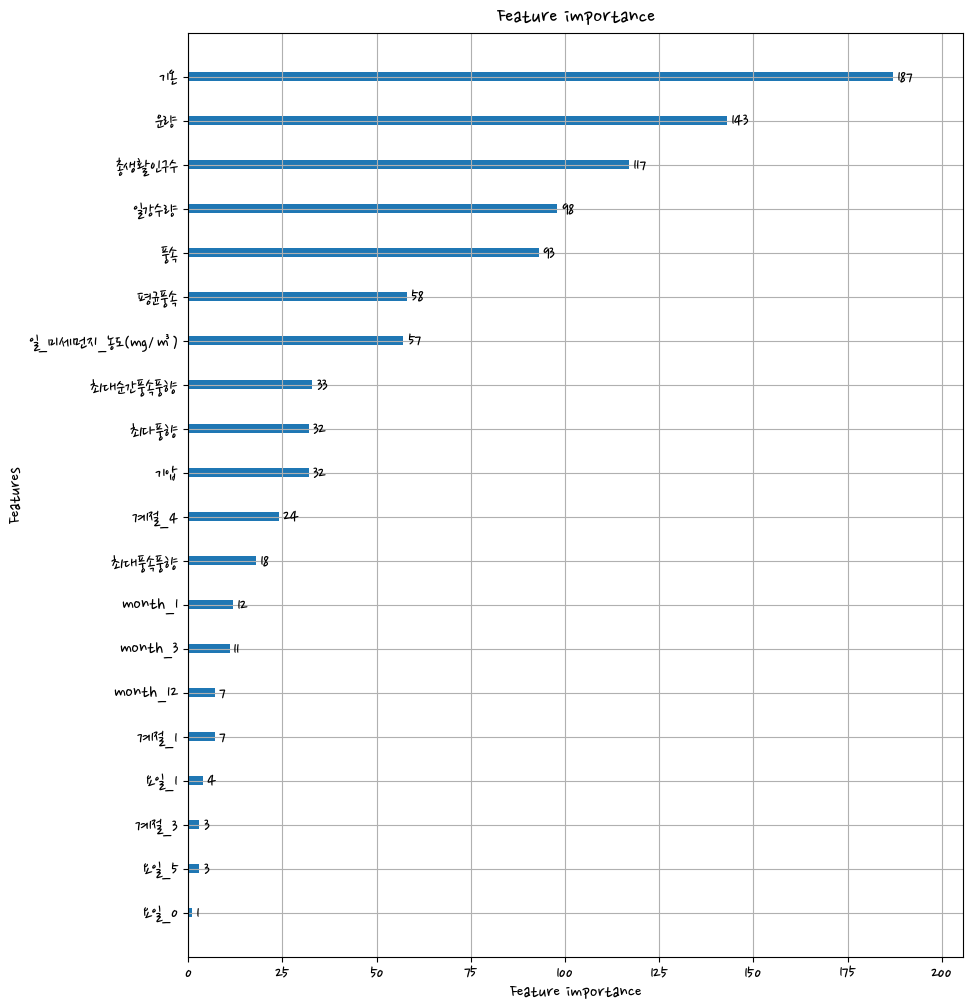

In [64]:
fig, ax = plt.subplots(figsize=(10,12))
plot_importance(lgbm, ax=ax)

In [65]:
for solve, predd in zip(np.expm1(y_test), np.expm1(pred)):
    print(f'{solve}, {predd}')

8055.0000000000055, 8758.2333984375
7133.999999999995, 6633.9541015625
2441.0, 1821.0457763671875
2963.9999999999986, 2695.44677734375
7919.000000000003, 7287.955078125
8169.999999999995, 7857.14599609375
2032.0000000000007, 1211.35888671875
7971.999999999999, 7501.6083984375
5590.0, 4896.19091796875
1524.0000000000005, 1523.681396484375
6744.999999999999, 5408.2734375
2404.0, 2155.748046875
7079.999999999999, 8041.6708984375
9120.000000000002, 8514.6318359375
6644.000000000003, 6392.4365234375
2370.000000000001, 3204.42626953125
3036.9999999999986, 3354.665283203125
9042.999999999995, 9281.978515625
9297.0, 9002.0791015625
5095.999999999999, 4520.845703125
6905.000000000004, 6966.271484375
5983.999999999999, 7219.60546875
4055.999999999997, 2718.00537109375
3193.0000000000005, 3247.70849609375
4011.9999999999995, 3853.656494140625
4101.999999999998, 2844.201416015625
3521.999999999999, 5236.68505859375
2043.0000000000002, 1894.6490478515625
5317.999999999995, 2722.51708984375
9699.000

In [ ]:
from hyperopt import hp

In [ ]:
lgb_space = {
    'max_depth': hp.quniform('max_depth', 5, 20, 1),
    'min_child_weight': hp.quniform('min_child_weight', 1,2,1),
    'learning_rate':hp.uniform('learning_rate',0.01,0.2),
    'colsample_bytree' : hp.uniform('colsample_bytree',0.5,1)
}


In [ ]:
from hyperopt import STATUS_OK

In [ ]:
# def objective_func(lgb_space):
#     max_depth=lgb_space[max_depth]
#     min_child_weight=lgb_space[min_child_weight]
#     learning_rate=lgb_space[learning_rate]
#     colsample_bytree=lgb_space[colsample_bytree]
#     reval = 

In [ ]:
from hyperopt import fmin, tpe, Trials

In [ ]:
# trival_val = Trials()

# best_01 = fmin(fn=objective_func, space=search_space, algo=tpe.suggest, max_evals=5,
#               trials=trial_val, rstate=np.random.default_rng(seed=0))
# print('best:',best_01)